In [1]:
import pickle
import plotly.graph_objects as go
from copy import copy, deepcopy
from pprint import pprint
from Geometry3D import Point, distance, HalfLine, Plane
import Geometry3D
import gcline
from importlib import reload

#import numpy as np
#suppress scientific notation
#np.set_printoptions(suppress=True, precision=8)
#import parsers.cura4
#from parsers import cura4

import threader, geometry_helpers, gcode, gcline, tlayer, util, cura4layer, lablogging, rich_output_handler, logger, plot_styles
import parsers.cura4 as cura4
from geometry_helpers import GPoint
from threader import Threader
from tlayer import TLayer
from util import find, GCodeException
from danutil import dupcount
import plot_helpers, plotting, plot_styles
from plotting import plot_steps
import geometry.utils
import ender3

from rich.syntax import Syntax
from rich.console import Console
from rich.theme import Theme
rich_console = Console(force_jupyter=True, theme=Theme())

#Attempt to reload modules automatically
%load_ext autoreload
%autoreload 2

reload threader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#Fusion: smaller complex shape v1
gcode_file = '/Users/dan/r/thread_printer/stl/test2/Smaller complex shape - cura.gcode'
cura_project = '/Users/dan/r/thread_printer/stl/test2/Smaller complex shape - cura.3mf'
# From cura4.parse_3mf(cura_project) so I don't have to run that every time
thread_transform = np.array([39.26039839, 46.27034378, 23.87050056])
#See thread_from_fusion.py to get thread path
tpath = [
		([33.7300, 17.1077, 11.4653], [56.0477, 43.4545, 11.4653]),
		([56.0477, 43.4545, 11.4653], [53.2410, 59.2656, 11.4653]),
		([53.2410, 59.2656, 11.4653], [26.9901, 69.3288, 42.0560]),
		([26.9901, 69.3288, 42.0560], [26.9901, 69.3288, 47.7410]),
]

In [2]:
gcode_file = '/Users/dan/r/thread_printer/stl/test3/Router test-cura5.gcode'
cura_project = '/Users/dan/r/thread_printer/stl/test3/Router test-cura5.3mf'
#thread_transform = np.array([27.43560219, 27.43383789,  5.0])
tpath = [
	([18.2689, 14.9338, 3.3333], [18.2689, 36.6005, 3.3333]),
	([18.2689, 36.6005, 3.3333], [36.6023, 36.6005, 3.3333]),
	([36.6023, 36.6005, 3.3333], [36.6023, 18.2672, 3.3333]),
	([36.6023, 18.2672, 3.3333], [21.6023, 18.2672, 3.3333]),
	([21.6023, 18.2672, 3.3333], [21.6023, 21.6005, 6.6667]),
	([21.6023, 21.6005, 6.6667], [21.6023, 36.6005, 6.6667]),
	([21.6023, 36.6005, 6.6667], [33.2689, 36.6005, 6.6667]),
	([33.2689, 36.6005, 6.6667], [33.2689, 21.6005, 6.6667])
]

In [ ]:
thread_transform = cura4.parse_3mf(cura_project)
thread_transform

In [38]:
#tpath = np.array(tpath)

#Do it this way so I can add transform if needed
#tpath = np.insert(tpath, 0, [[0,0,0], tpath[0,0]], axis=0)

#Temporary fix for TODO in cura4.parse3mf
#thread_transform[2] = 0

g = gcode.GcodeFile(gcode_file, layer_class=TLayer)
t = Threader(g)

#start_layer = next(layer for layer in g.layers if (layer.z + layer.layer_height) >= tpath[0][1][2])
#start_layer = g.layers[56]

thread_geom = list([geometry_helpers.GSegment(GPoint(*s), GPoint(*e)) for s,e in tpath])

logger.restart_logging()
t.route_model(thread_geom)#), end_layer=17)

#gc = t.layer_steps[16].gcode()
#if dups := dupcount([l.lineno for l in gc if l.lineno]):
#    print(dups)

Accordion()

In [28]:
g.layers[16].preamble

<GCLines with 7 lines from 4489 to 4495>
G0 F300 X23.736 Y31.016 Z3.4 ; [4489]
G0 F9000 X24.066 Y30.354 ; [4490]
G0 X24.066 Y29.269 ; [4491]
G0 X24.066 Y25.599 ; [4492]
G0 X24.066 Y24.514 ; [4493]
G0 X24.066 Y24.064 ; [4494]
G1 F1500 E419.41107 ; [4495]

angle: -12.818455665395367 + 53.912 -> 41.09354433460463 -> 41.09354433460463
angle: 41.09354433460463 + 60.849 -> 101.94254433460463 -> 101.94254433460463
angle: 101.94254433460463 + -96.63 -> 5.312544334604638 -> 5.312544334604638
angle: 5.312544334604638 + -95.869 -> -90.55645566539536 -> 269.44354433460467
angle: 269.44354433460467 + -83.436 -> 186.00754433460466 -> 186.00754433460466


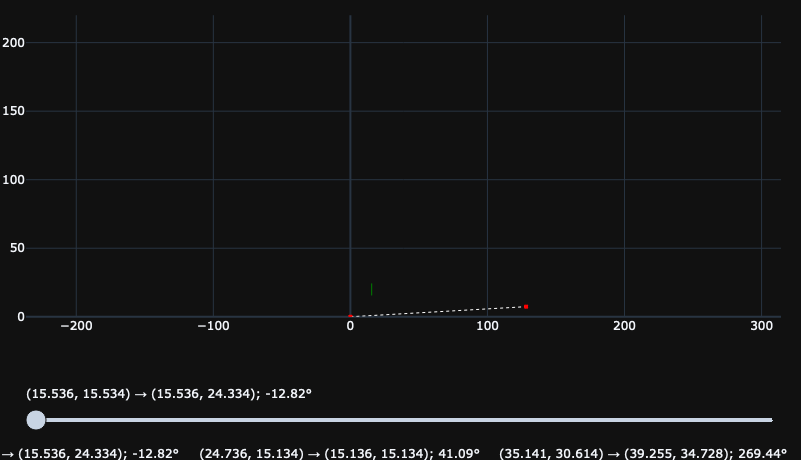

In [36]:
fig, figd = plotting.animate_gcode(gc, ender3.bed_config, ender3.ring_config, start_angle=t.layer_steps[15].steps[-1].printer.ring.angle)

In [32]:
with open('/tmp/all.gcode', 'w') as f:
    f.write('\n'.join([l.construct() for l in t.gcode()]))

In [31]:
g.layers[16].geometry.segments[0]

<S[ 6] 4496:{ 24.34,  24.33,   3.40}←→4501:{ 24.34,  15.53,   3.40} (8.80 mm)>

In [4]:
rich_console.print(Syntax('\n'.join([l.construct() for l in t.]), 'gcode', line_numbers=True))

    1 ;  Step 0 (106 lines): Print 37 segments thread doesn't intersect ---------------------------                
    2 G0 X15.536 Y15.534 ;  [4502] (fake)                                                                          
    3 G1 X15.536 Y24.334 E420.28914 ; [4503]                                                                       
    4 G0 X15.136 Y15.134 ;  [4508] (fake)                                                                          
    5 G1 X15.136 Y24.734 E421.53972 ; [4509]                                                                       
    6 G0 F9000 X15.806 Y15.804 ; [4514]                                                                            
    7 G0 X15.836 Y17.465 ; [4515]                                                                                  
    8 G0 X15.615 Y17.465 ; [4516]                                                                                  
    9 G1 F3000 X17.467 Y15.613 E422.35253 ; [4517]                                                                 
   10 G0 F9000 X24.255 Y22.402 ;  [4520] (fake)                                                                    
   11 G1 F3000 X22.403 Y24.253 E422.73957 ; [4521]                                                                 
   12 G0 F9000 X24.255 Y20.139 ;  [4530] (fake)                                                                    
   13 G1 F3000 X20.141 Y24.253 E423.62008 ; [4531]                                                                 
   14 G0 F9000 X22.403 Y15.614 ;  [4538] (fake)                                                                    
   15 G1 F3000 X24.255 Y17.465 E424.20061 ; [4539]                                                                 
   16 G0 F9000 X17.466 Y24.253 ;  [4542] (fake)                                                                    
   17 G1 F3000 X15.615 Y22.402 E424.58761 ; [4543]                                                                 
   18 G0 F9000 X23.736 Y16.016 ; [4548]                                                                            
   19 G1 F1500 E418.49396 ; [4549]                                                                                 
   20 ; [4550] MESH:Router test.3mf(4)                                                                             
   21 G0 F9000 X24.516 Y24.064 ; [4551]                                                                            
   22 G0 X25.601 Y24.064 ; [4552]                                                                                  
   23 G0 X29.271 Y24.064 ; [4553]                                                                                  
   24 G0 X30.356 Y24.064 ; [4554]                                                                                  
   25 G0 X39.066 Y24.064 ; [4555]                                                                                  
   26 G1 F1500 E424.99396 ; [4556]                                                                                 
   27 G0 F9000 X39.336 Y24.334 ; [4557]                                                                            
   28 ; [4558] TYPE:WALL-INNER                                                                                     
   29 G1 F1500 X39.336 [38;2;102;217;239;48;2;39;40;34

In [100]:
gc[210].args

{'E': -95.869, 'F': 8000}

In [78]:
from copy import deepcopy

In [82]:
c = deepcopy(t.layer_steps[0].printer)
c

Printer(⚓︎{ 21.60,  18.27,   3.40}, ∡ -173.99°)

In [83]:
id(c) == id(t.layer_steps[0].printer)

False

In [103]:
i = 5
[(p.mode[0], (j<i and p.mode=='lines') or j==i) for j,p in enumerate(fig.data[:8])]

[('m', False),
 ('m', False),
 ('m', False),
 ('m', False),
 ('l', True),
 ('m', True),
 ('m', False),
 ('l', False)]

Preview of 15 steps for layer 16


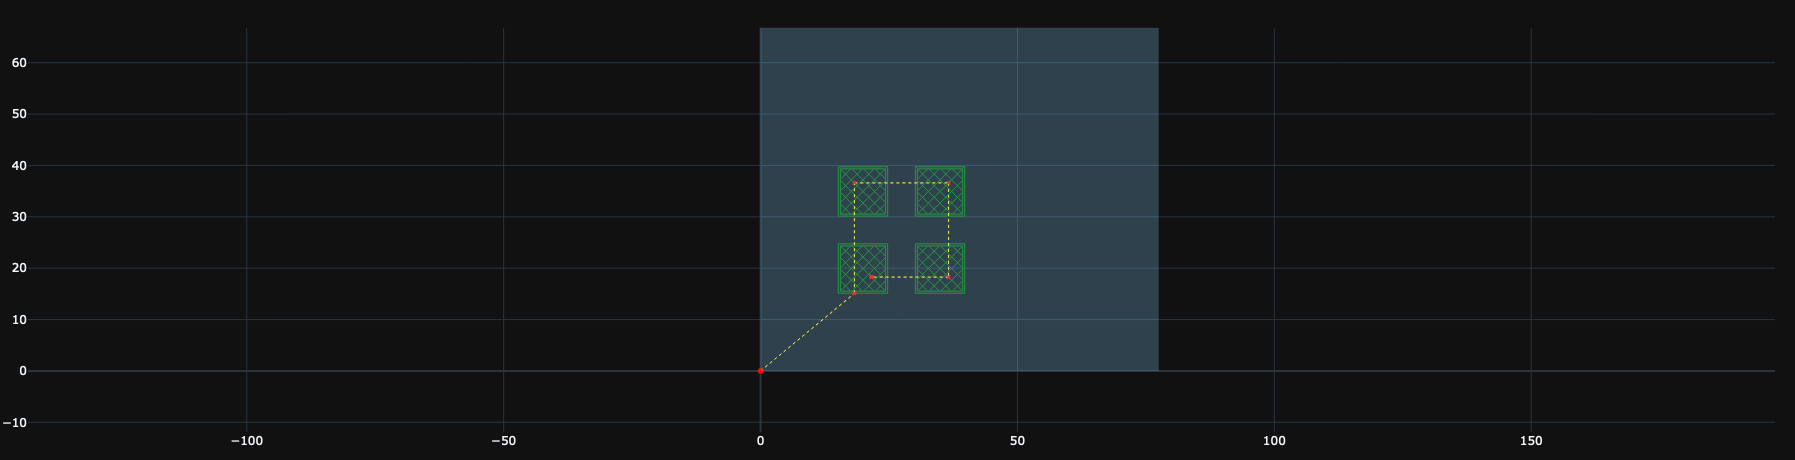

Step 0: Print 37 segments thread doesn't intersect


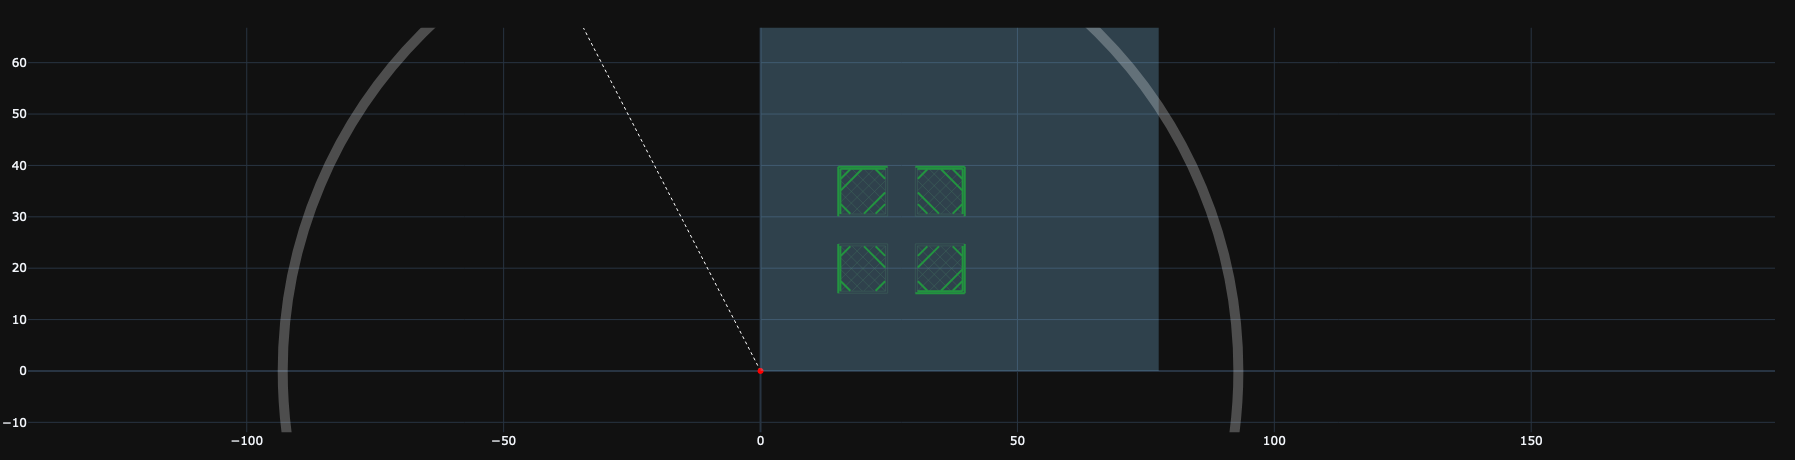

Step 1: Move thread to overlap anchor at { 18.27,  15.13,   3.40}


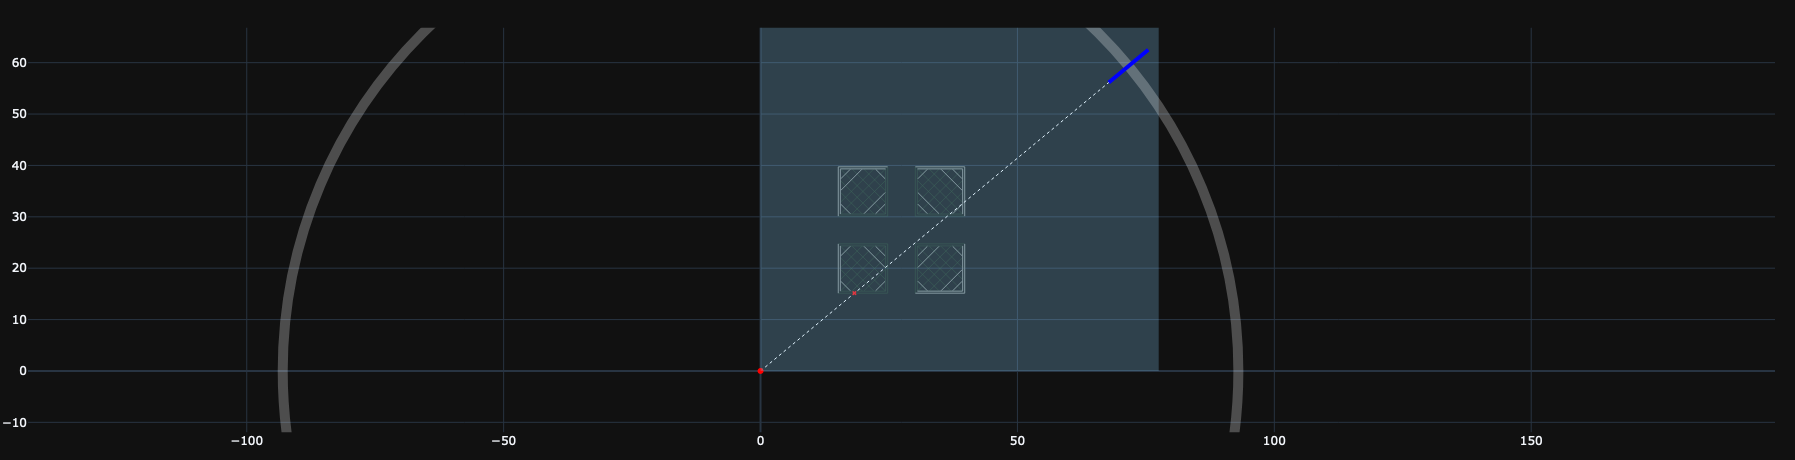

Step 2: Print 1 segment to fix anchor


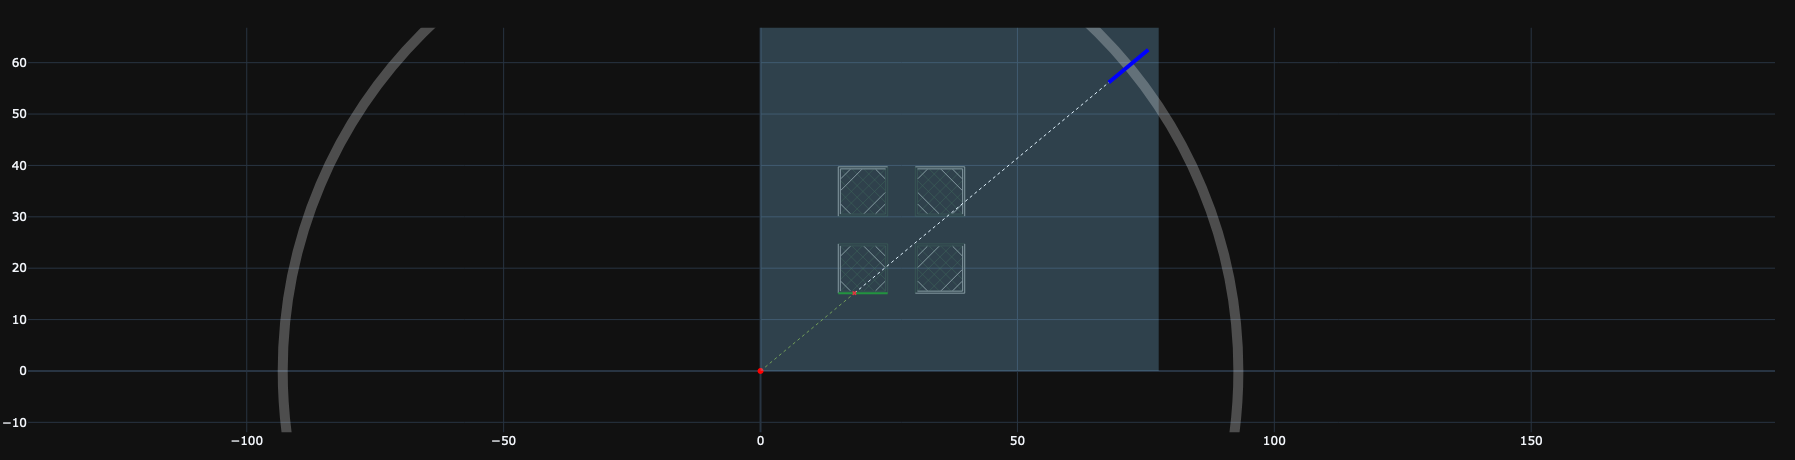

Step 3: Move thread to overlap anchor at { 18.27,  36.60,   3.40}


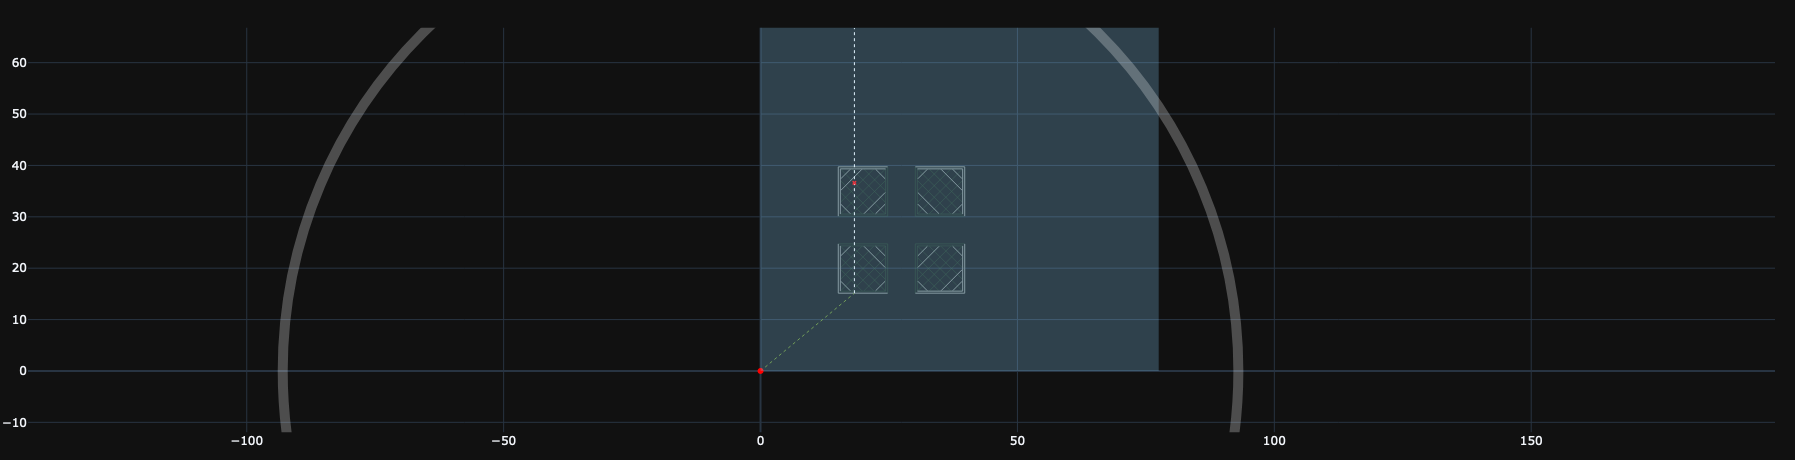

Step 4: Print 1 segment to fix anchor


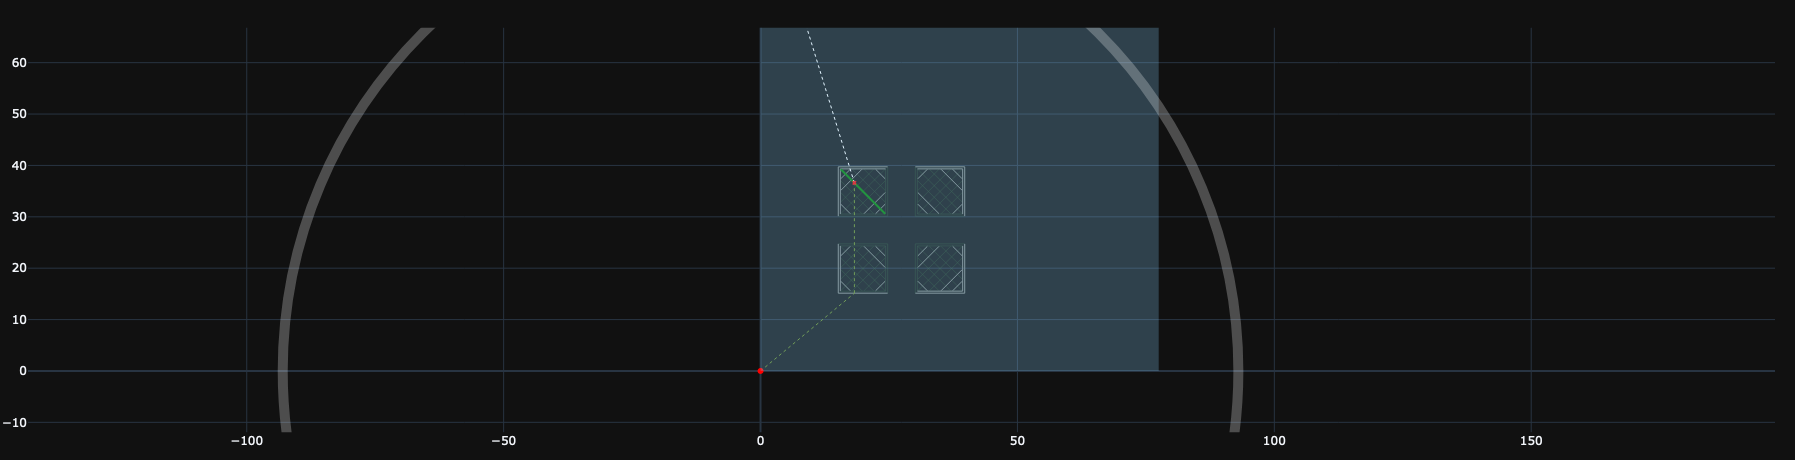

Step 5: Print 13 segments thread doesn't intersect


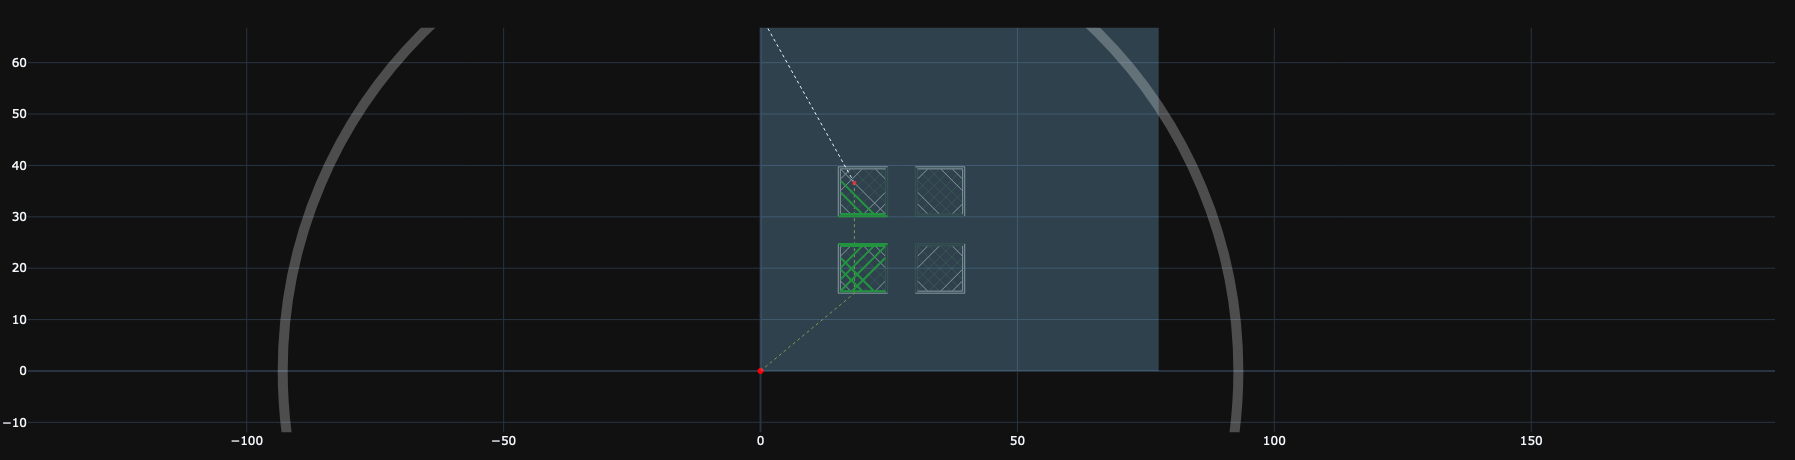

Step 6: Move thread to overlap anchor at { 36.60,  36.60,   3.40}


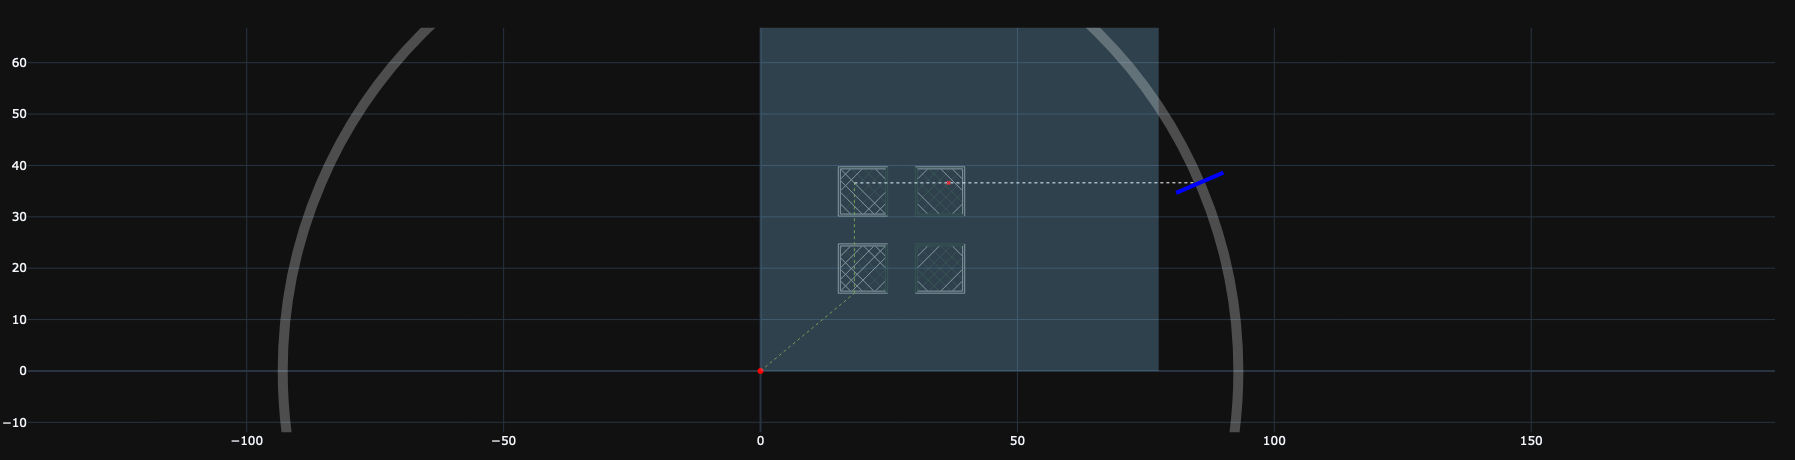

Step 7: Print 1 segment to fix anchor


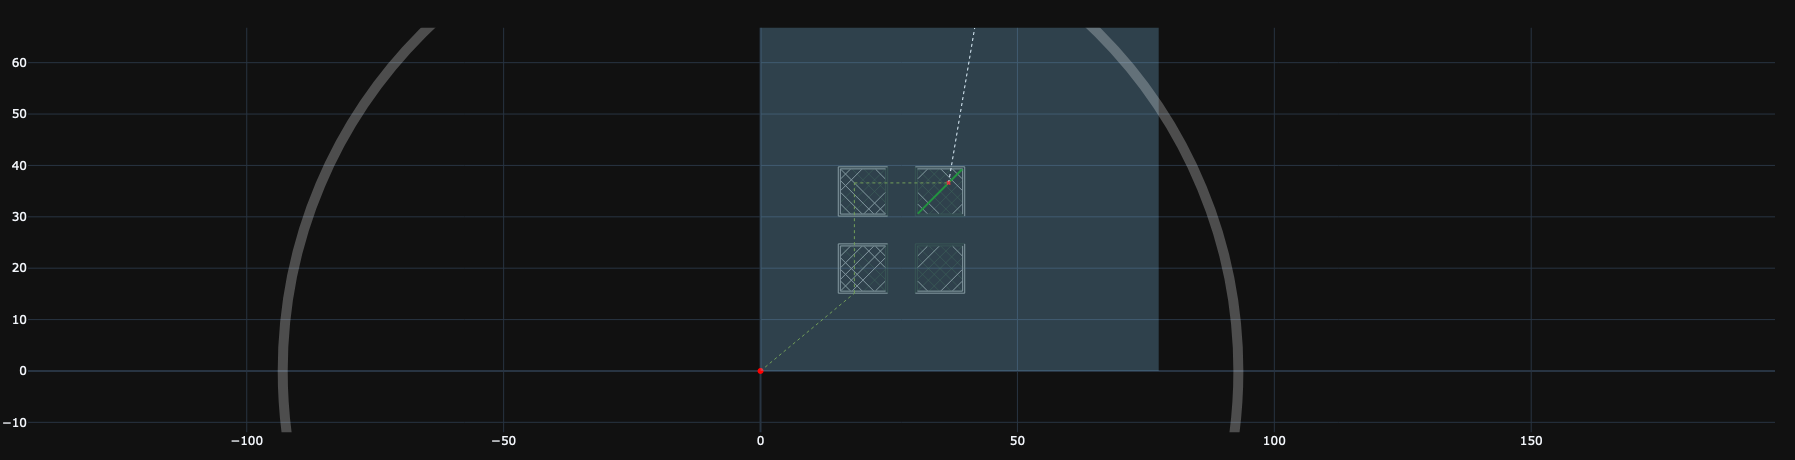

Step 8: Print 11 segments thread doesn't intersect


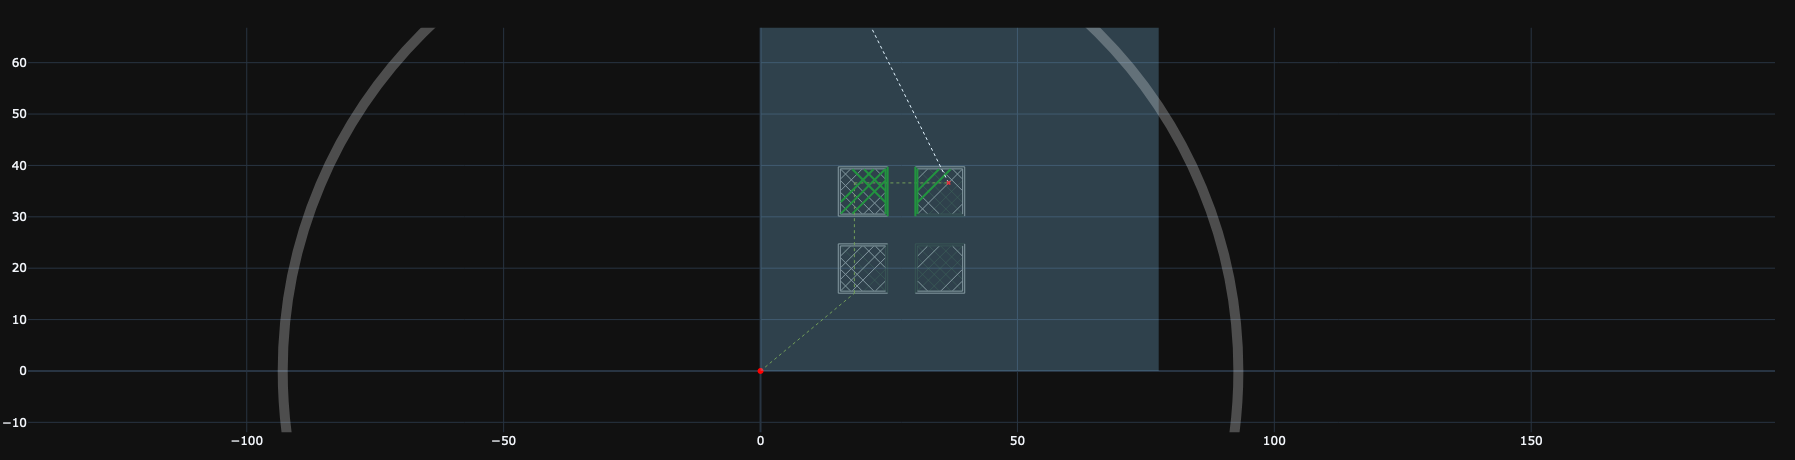

Step 9: Move thread to overlap anchor at { 36.60,  18.27,   3.40}


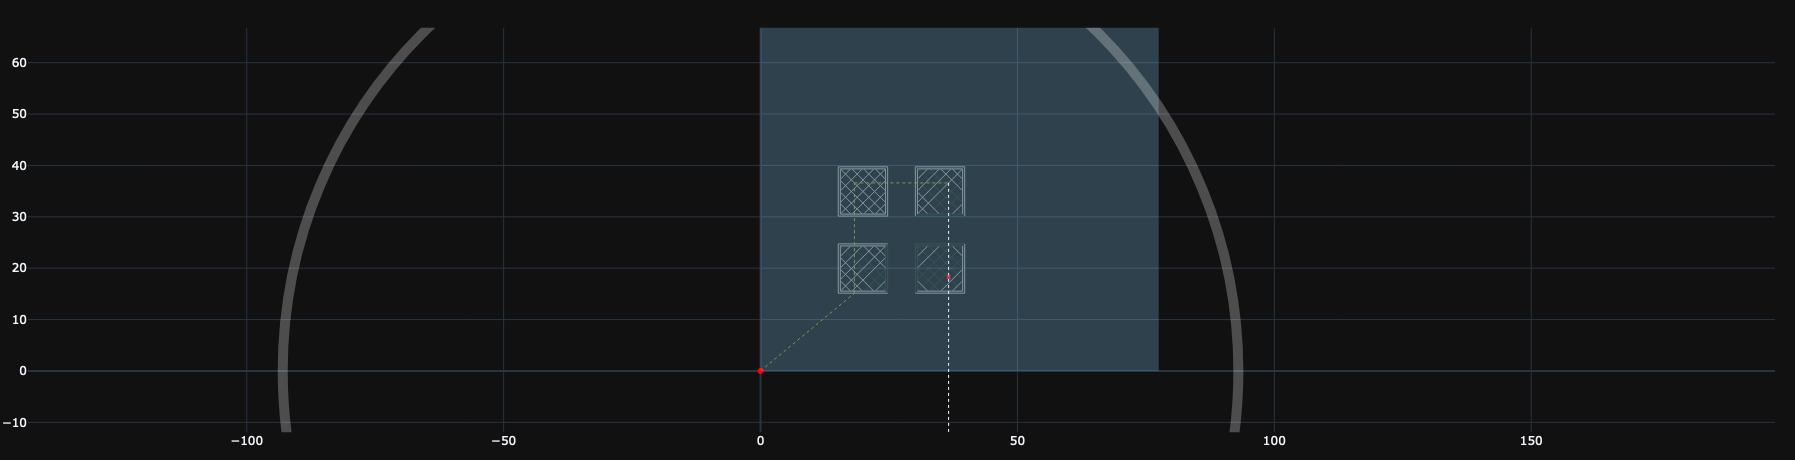

Step 10: Print 1 segment to fix anchor


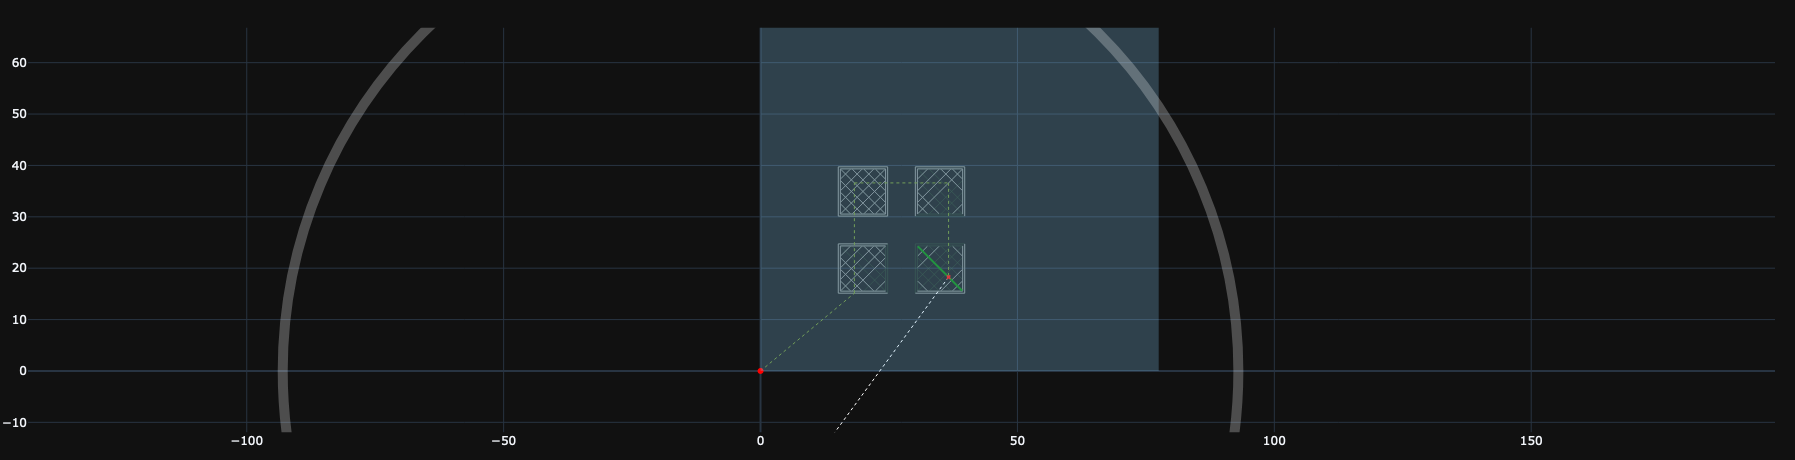

Step 11: Print 11 segments thread doesn't intersect


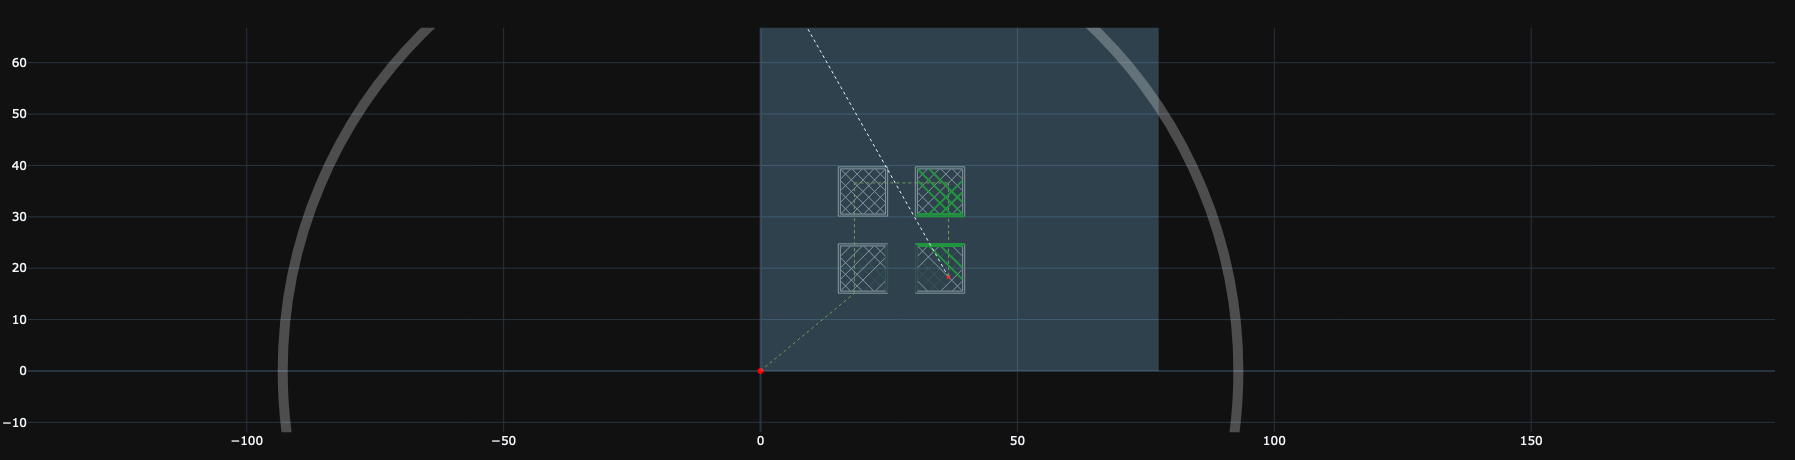

Step 12: Move thread to overlap anchor at { 21.60,  18.27,   3.40}


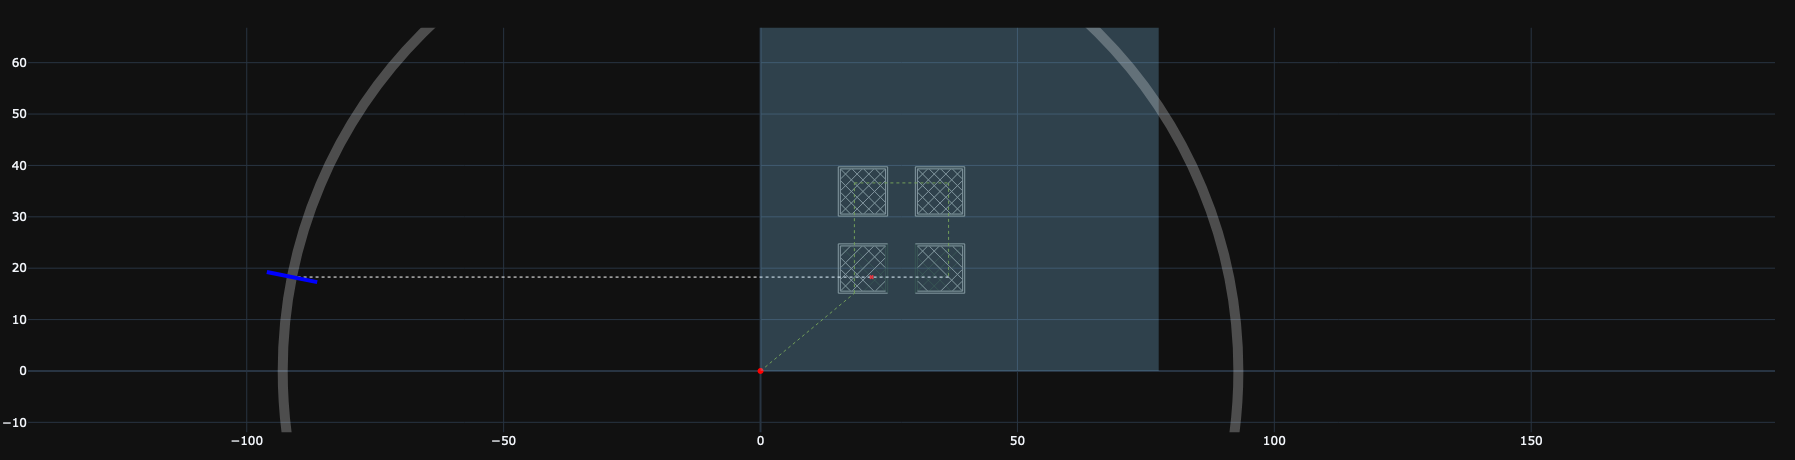

Step 13: Print 1 segment to fix anchor


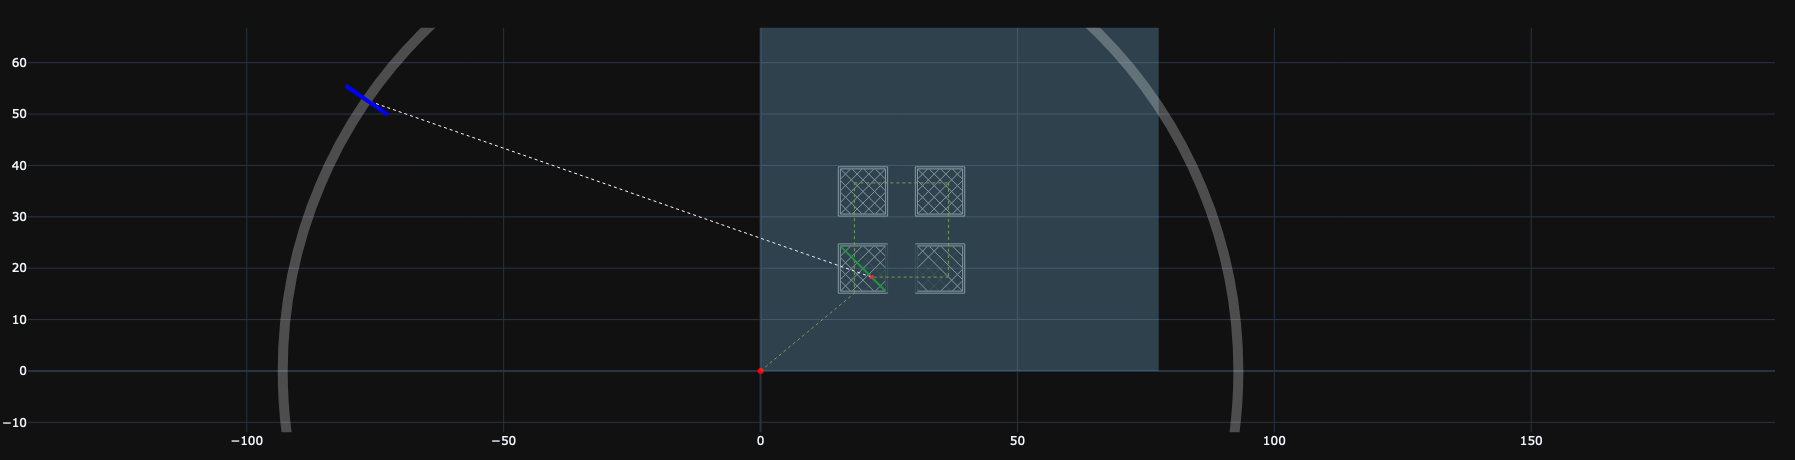

Step 14: Print 11 segments thread doesn't intersect


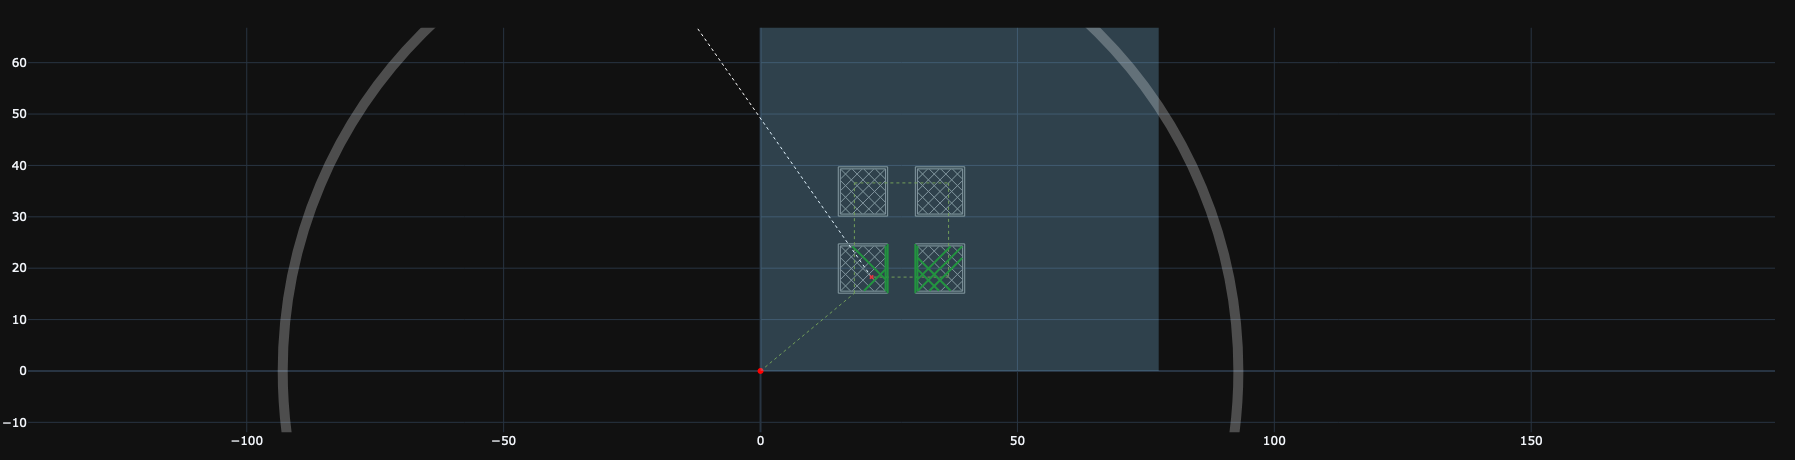

Finished routing this layer


In [65]:
l = 16
plotting.plot_steps(t.layer_steps[l], prev_layer=g.layers[l-1], prev_layer_only_outline=False)

In [36]:
_32[2] == _32[7]

True

In [6]:
with open('/tmp/test0.gcode', 'w') as f:
    f.write('\n'.join([l.construct() for l in _4]))

In [33]:
t.layer_steps[16].printer.ring.initial_angle

168.6664315792073